# 1. 데이터 전처리 및 EDA

## 1) 상관계수 플롯(연속형)- 비슷한 것은 제거

In [1]:
# 데이터 불러오기
import pandas as pd
ds = pd.read_csv('student-por.csv', index_col=0, header=0)
ds = ds.reset_index()
ds.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [193]:
# 결측치 확인 
pd.isnull(ds).sum().sum()

0

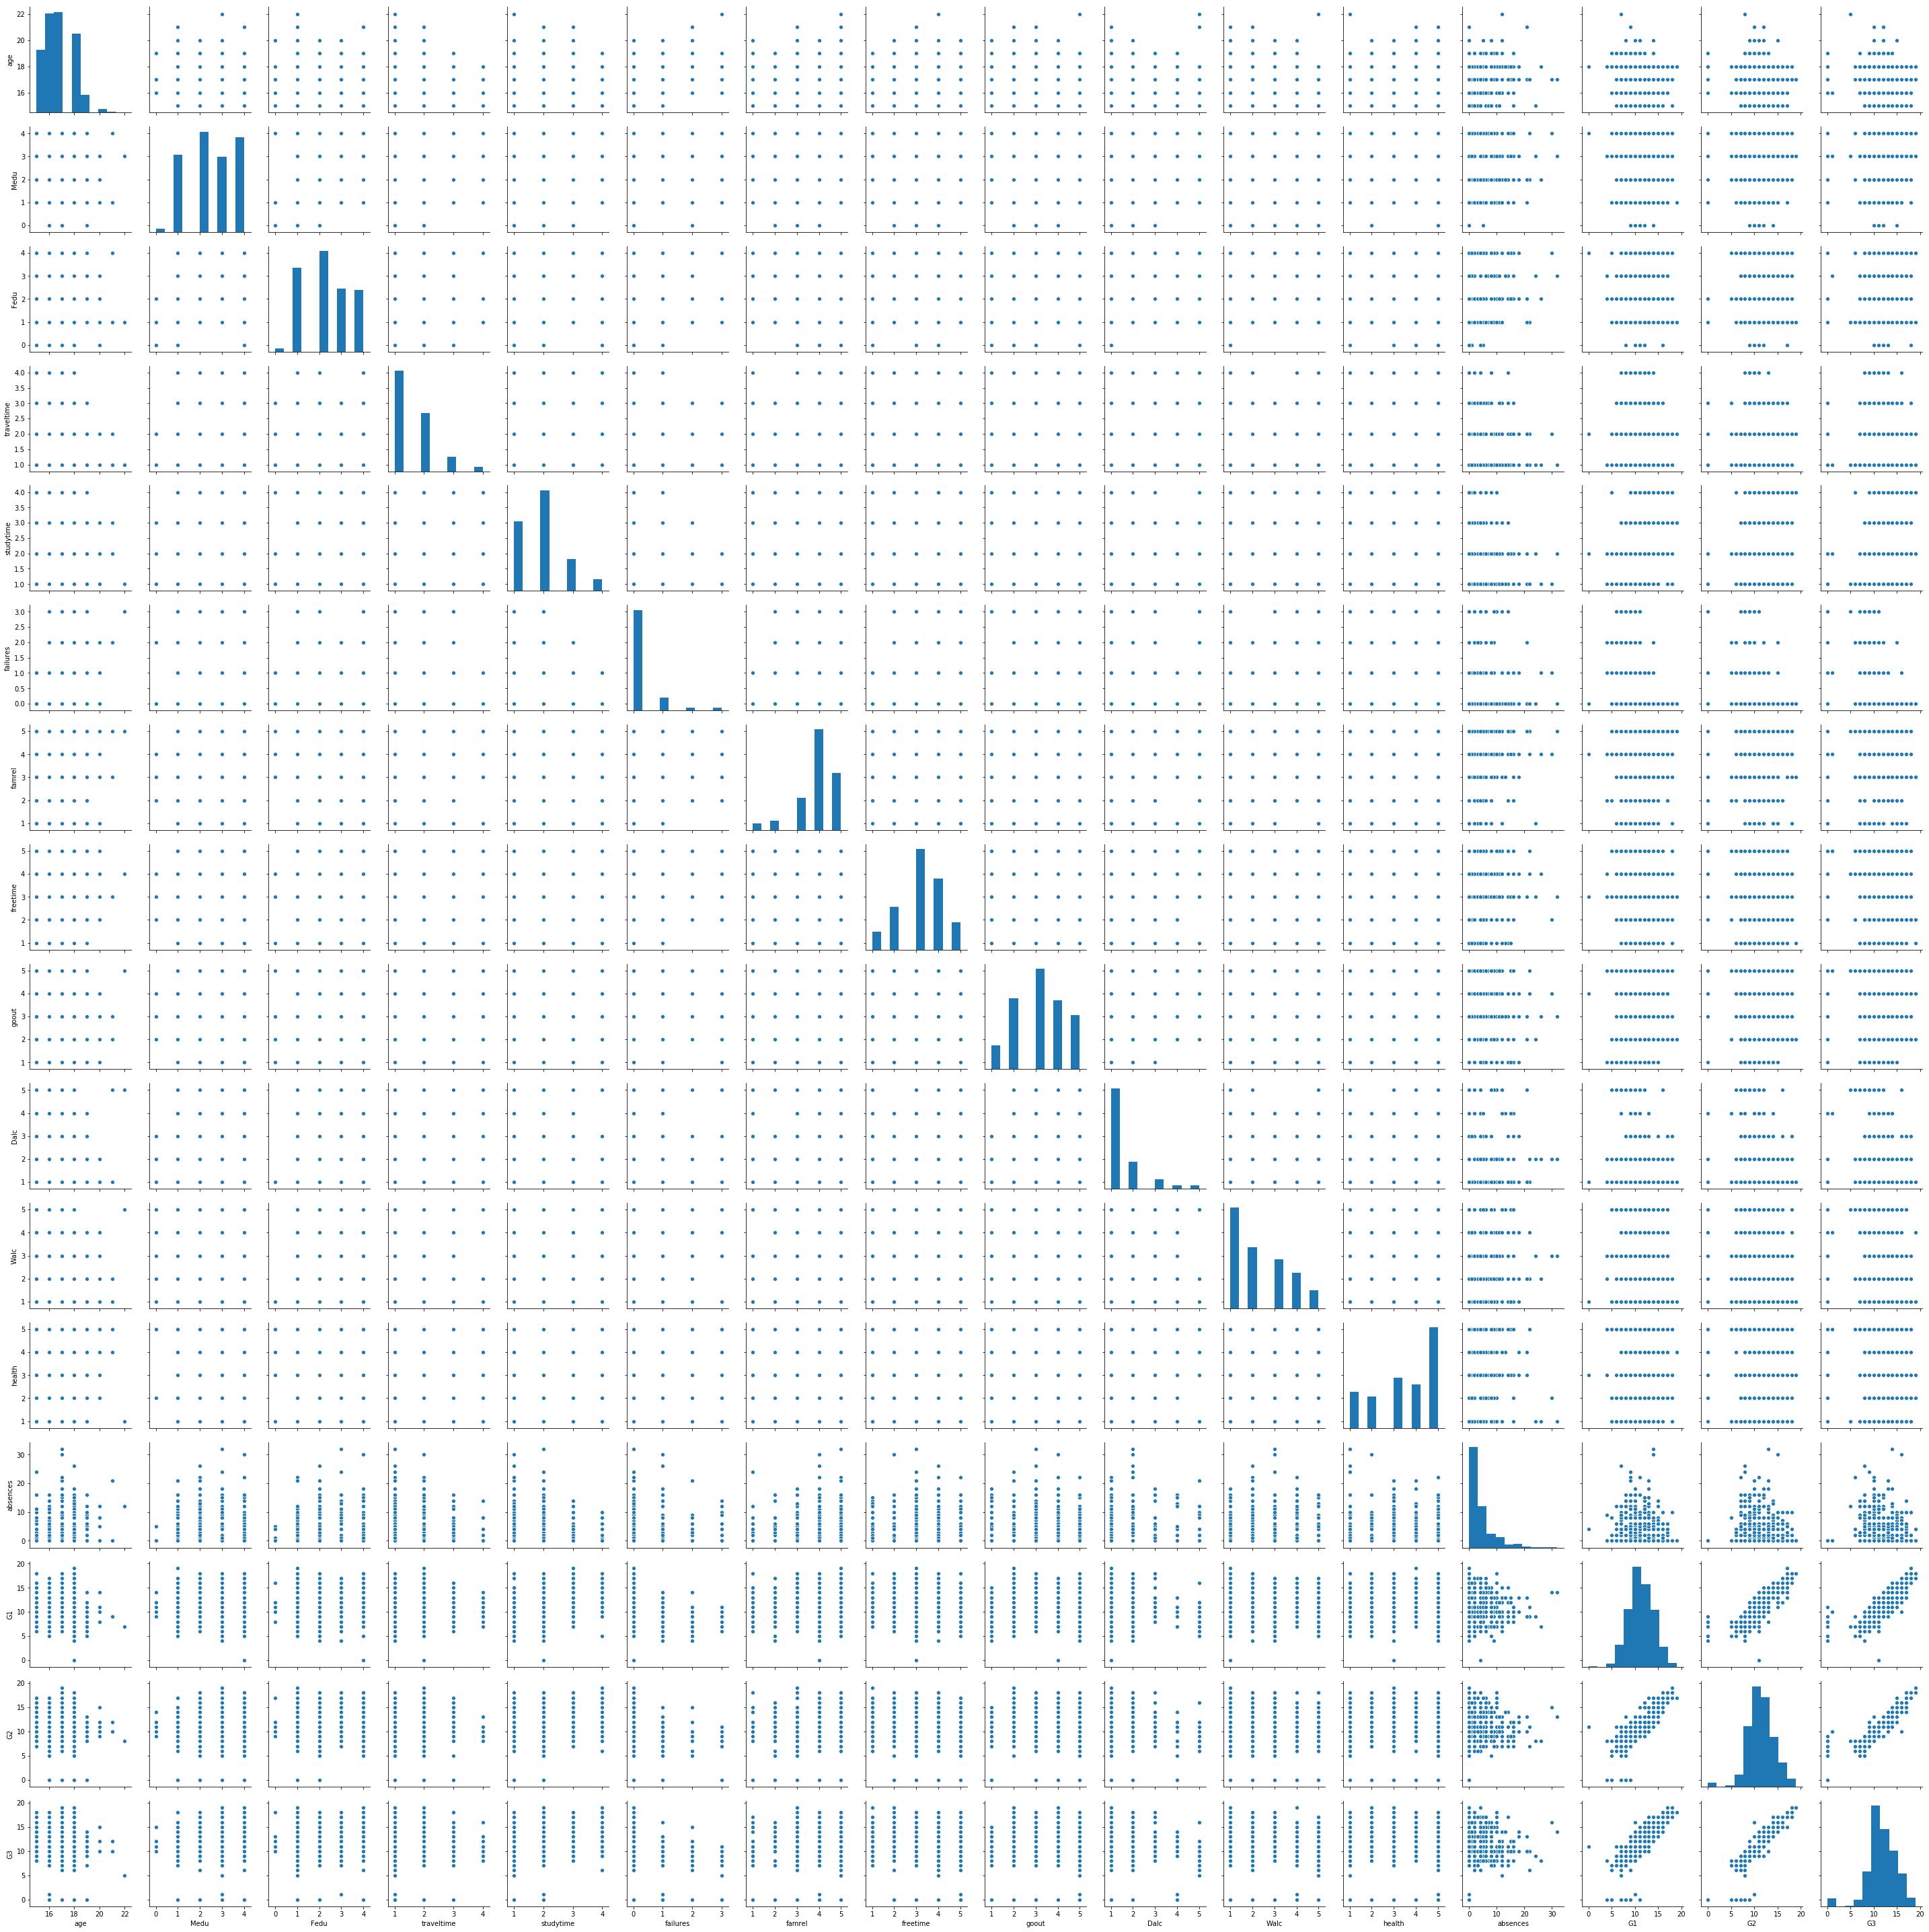

In [64]:
numeric = ds.corr().index # 연속형, 리커트, 순서형 포함
sns.pairplot(data=ds.loc[:,numeric]) # 모든 변수가 정규분포인 것은 아닌 것을 확인 -> 스피어만 상관계수 사용

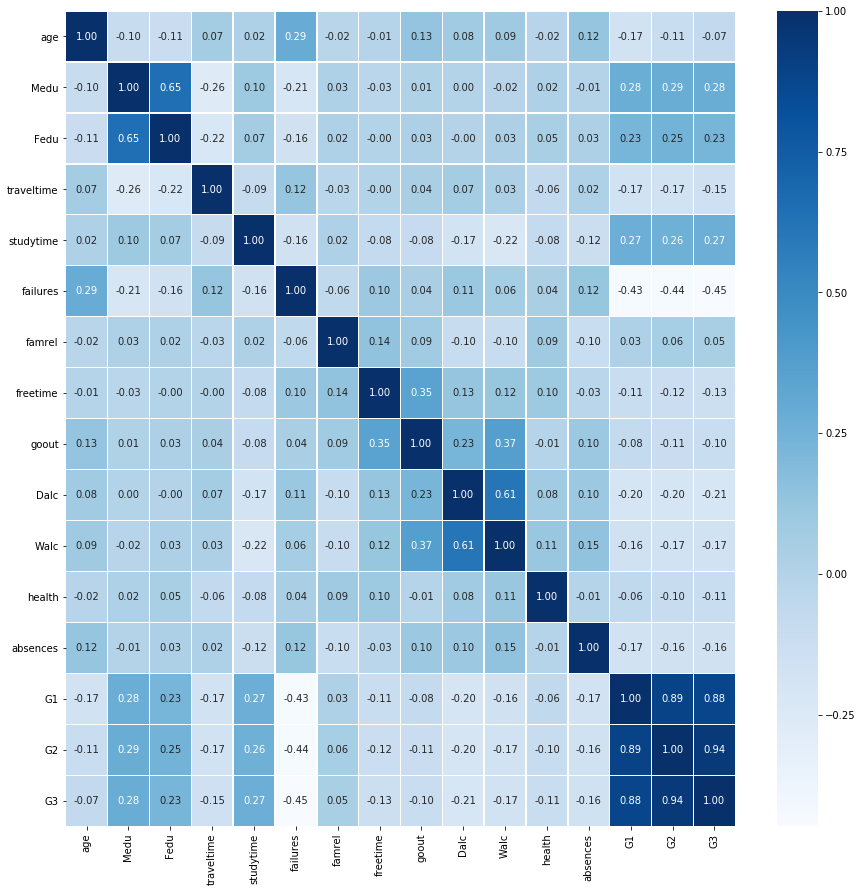

In [7]:
# 스피어만 상관계수 플롯 그리기(https://m.blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=221205309816&proxyReferer=https%3A%2F%2Fwww.google.com%2F)
%matplotlib inline
import matplotlib.pyplot as plt;import seaborn as sns;plt.figure(figsize=(15,15))
sns.heatmap(data=ds.corr(method='spearman'),annot=True,fmt='.2f',linewidths=.5,cmap='Blues') 
# Medu와 Fedu 비슷하고, 성적간 상관계수가 Medu가 더 높기에 Fedu 삭제.
# Dalc와 Walc 비슷하고, 성적간 상관계수가 Dalc가 더 높기에 Walc 삭제.
# 그리고 3년 동안 학생들이 설문문항대로 답한 것이 일정했다는 가정을 해야함. 설문을 언제 답했는지 알 수 없기 때문.
# 따라서, G1,G2,G3를 합쳐서 G로 만들자. 


## 2) 빈도 파악(범주형)

In [8]:
# 1) G1,G2,G3의 평균을 G로 만들기 2) Fedu, Walc, G1, G2, G3 삭제하기 3) Medu 변수 문자형으로
ds['G'] = ds.loc[:,['G1','G2','G3']].mean(axis=1)
ds1 = ds.drop(['Fedu','Walc','G1','G2','G3'],axis=1)
ds1['Medu'] = ds1['Medu'].apply(str)
ds1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,G
0,GP,F,18,U,GT3,A,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,3,4,7.333333
1,GP,F,17,U,GT3,T,1,at_home,other,course,...,yes,yes,no,5,3,3,1,3,2,10.333333
2,GP,F,15,U,LE3,T,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,6,12.333333
3,GP,F,15,U,GT3,T,4,health,services,home,...,yes,yes,yes,3,2,2,1,5,0,14.000000
4,GP,F,16,U,GT3,T,3,other,other,home,...,yes,no,no,4,3,2,1,5,0,12.333333


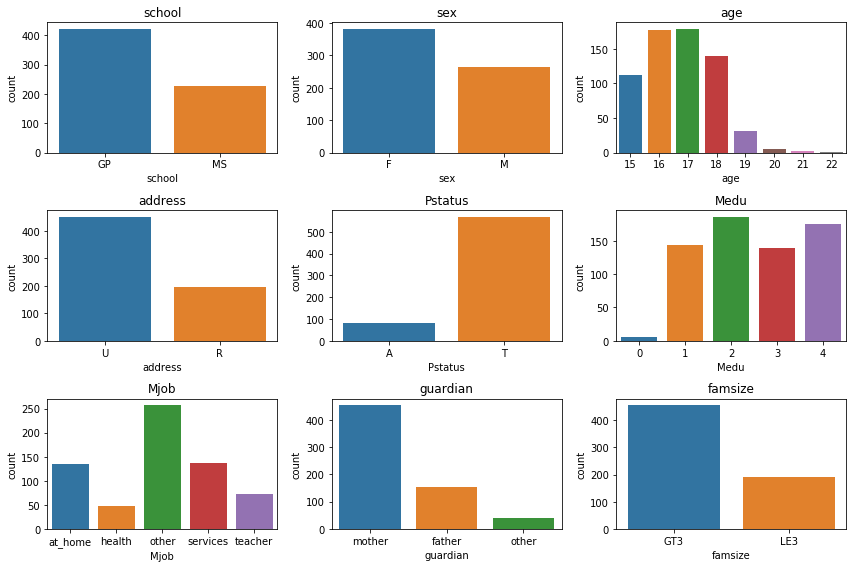

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(3,3,1) 
sns.countplot(x='school', data=ds1)
plt.title('school')

plt.subplot(3,3,2) 
sns.countplot(x='sex', data=ds1)
plt.title('sex')

plt.subplot(3,3,3) 
sns.countplot(x='age', data=ds1)
plt.title('age')

plt.subplot(3,3,4) 
sns.countplot(x='address', data=ds1)
plt.title('address')

plt.subplot(3,3,5) 
sns.countplot(x='Pstatus', data=ds1)
plt.title('Pstatus')

plt.subplot(3,3,6) 
sns.countplot(x='Medu', data=ds1)
plt.title('Medu')

plt.subplot(3,3,7) 
sns.countplot(x='Mjob', data=ds1)
plt.title('Mjob')

plt.subplot(3,3,8) 
sns.countplot(x='guardian', data=ds1)
plt.title('guardian')

plt.subplot(3,3,9) 
sns.countplot(x='famsize', data=ds1)
plt.title('famsize')


plt.tight_layout() #플롯간 간격 자동으로 맞추기
plt.show()

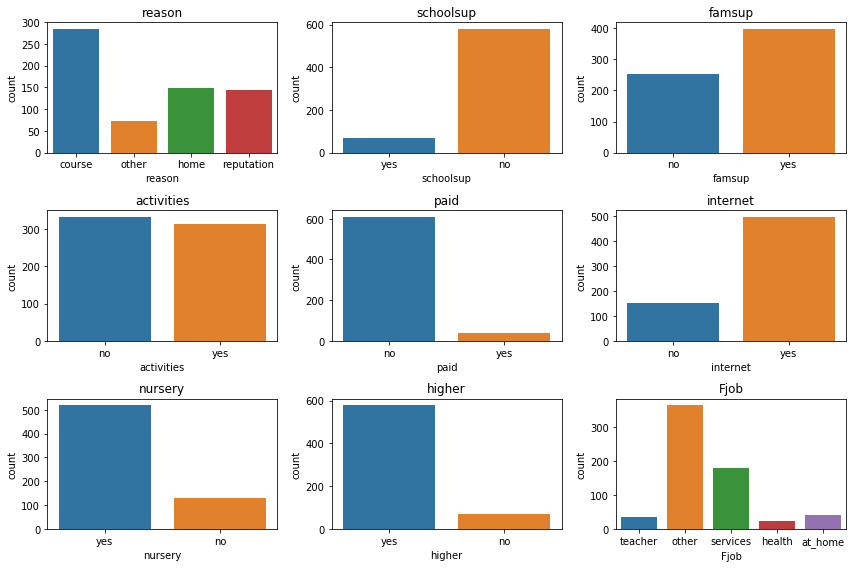

In [94]:
plt.figure(figsize=(12,8))

plt.subplot(3,3,1) 
sns.countplot(x='reason', data=ds1)
plt.title('reason')

plt.subplot(3,3,2) 
sns.countplot(x='schoolsup', data=ds1)
plt.title('schoolsup')

plt.subplot(3,3,3) 
sns.countplot(x='famsup', data=ds1)
plt.title('famsup')

plt.subplot(3,3,4) 
sns.countplot(x='activities', data=ds1)
plt.title('activities')

plt.subplot(3,3,5) 
sns.countplot(x='paid', data=ds1)
plt.title('paid')

plt.subplot(3,3,6) 
sns.countplot(x='internet', data=ds1)
plt.title('internet')

plt.subplot(3,3,7) 
sns.countplot(x='nursery', data=ds1)
plt.title('nursery')

plt.subplot(3,3,8) 
sns.countplot(x='higher', data=ds1)
plt.title('higher')

plt.subplot(3,3,9) 
sns.countplot(x='Fjob', data=ds1)
plt.title('Fjob')


plt.tight_layout() #플롯간 간격 자동으로 맞추기
plt.show()

Text(0.5, 1.0, 'romantic')

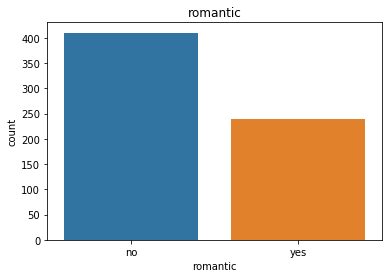

In [95]:
sns.countplot(x='romantic', data=ds1)
plt.title('romantic')


## 3) y와 school related, demographic, social 변수 나눠서 plot 보기

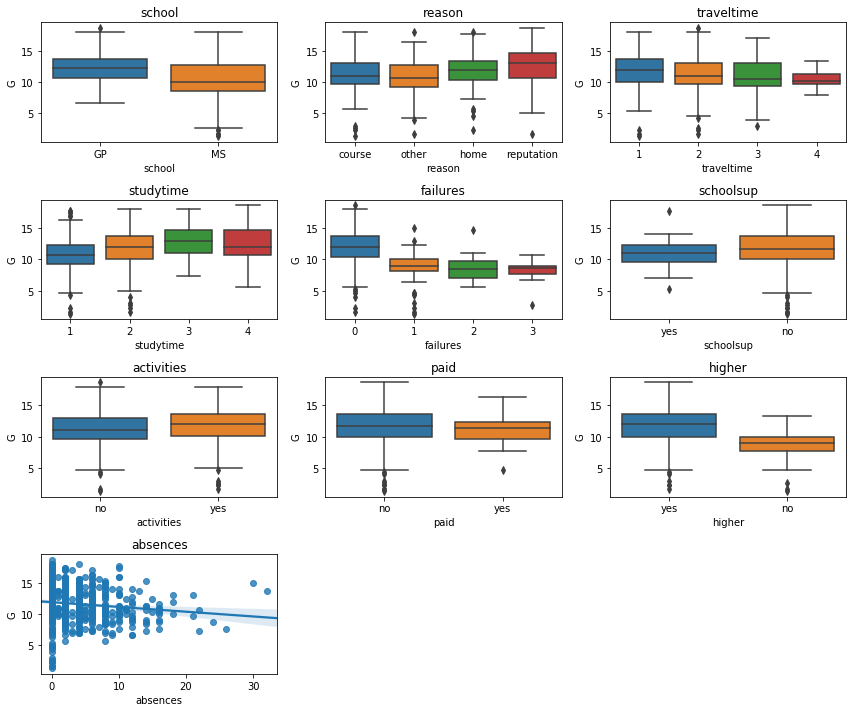

In [10]:
# school related
plt.figure(figsize=(12,10)) 

plt.subplot(4,3,1) 
sns.boxplot(x='school',y='G', data=ds1)
plt.title('school')

plt.subplot(4,3,2) 
sns.boxplot(x='reason',y='G', data=ds1)
plt.title('reason')

plt.subplot(4,3,3) 
sns.boxplot(x='traveltime',y='G', data=ds1)
plt.title('traveltime')

plt.subplot(4,3,4) 
sns.boxplot(x='studytime',y='G', data=ds1)
plt.title('studytime')

plt.subplot(4,3,5) 
sns.boxplot(x='failures',y='G', data=ds1); plt.title('failures')

plt.subplot(4,3,6) 
sns.boxplot(x='schoolsup',y='G', data=ds1)
plt.title('schoolsup')

plt.subplot(4,3,7) 
sns.boxplot(x='activities',y='G', data=ds1)
plt.title('activities')

plt.subplot(4,3,8) 
sns.boxplot(x='paid',y='G', data=ds1)
plt.title('paid')

plt.subplot(4,3,9) 
sns.boxplot(x='higher',y='G', data=ds1)
plt.title('higher')

plt.subplot(4,3,10) 
sns.regplot(x='absences',y='G', data=ds1)
plt.title('absences')


plt.tight_layout() #플롯간 간격 자동으로 맞추기
plt.show()

# failures: 높을수록 떨어짐, higher: 더 높은교육 원하면 올라감

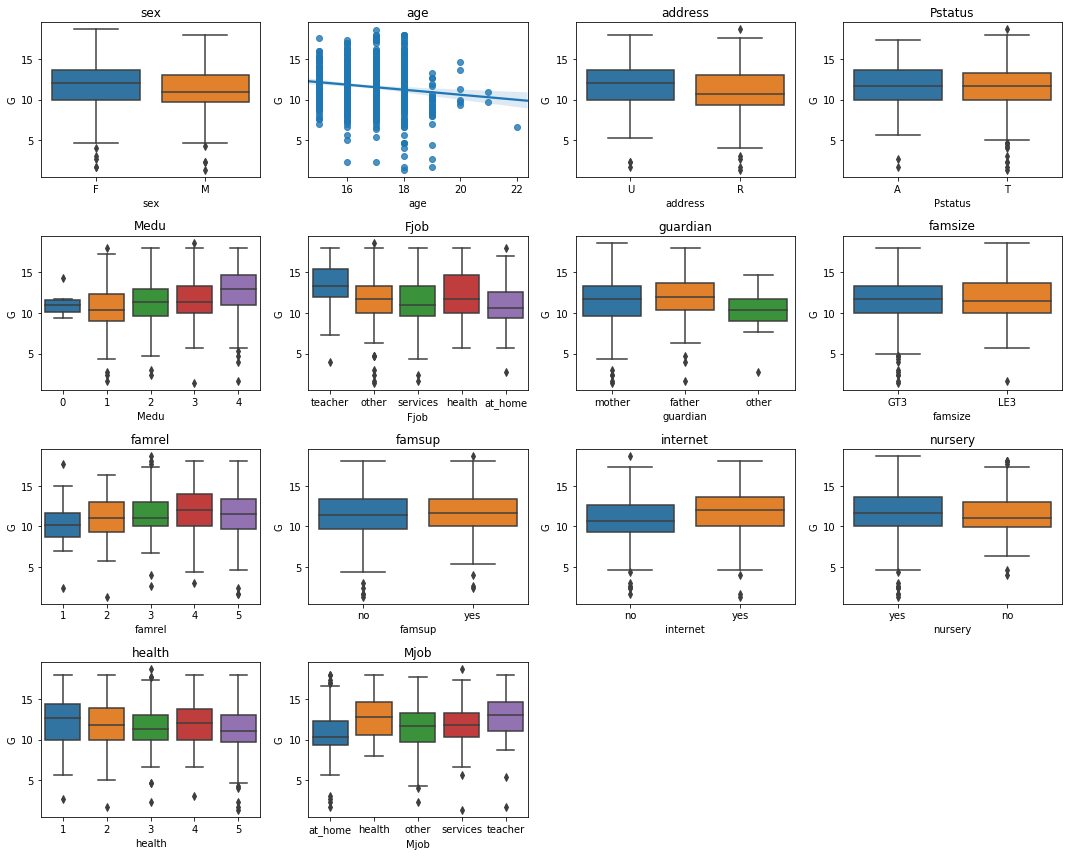

In [120]:
# demographic
plt.figure(figsize=(15,12))

plt.subplot(4,4,1) 
sns.boxplot(x='sex',y='G', data=ds1)
plt.title('sex')

plt.subplot(4,4,2) 
sns.regplot(x='age',y='G', data=ds1)
plt.title('age')

plt.subplot(4,4,3) 
sns.boxplot(x='address',y='G', data=ds1)
plt.title('address')

plt.subplot(4,4,4) 
sns.boxplot(x='Pstatus',y='G', data=ds1)
plt.title('Pstatus')

plt.subplot(4,4,5) 
sns.boxplot(x='Medu',y='G', data=ds1)
plt.title('Medu')

plt.subplot(4,4,6) 
sns.boxplot(x='Fjob',y='G', data=ds1)
plt.title('Fjob')

plt.subplot(4,4,7) 
sns.boxplot(x='guardian',y='G', data=ds1)
plt.title('guardian')

plt.subplot(4,4,8) 
sns.boxplot(x='famsize',y='G', data=ds1)
plt.title('famsize')

plt.subplot(4,4,9) 
sns.boxplot(x='famrel',y='G', data=ds1)
plt.title('famrel')

plt.subplot(4,4,10) 
sns.boxplot(x='famsup',y='G', data=ds1)
plt.title('famsup')

plt.subplot(4,4,11) 
sns.boxplot(x='internet',y='G', data=ds1)
plt.title('internet')

plt.subplot(4,4,12) 
sns.boxplot(x='nursery',y='G', data=ds1)
plt.title('nursery')

plt.subplot(4,4,13) 
sns.boxplot(x='health',y='G', data=ds1)
plt.title('health')

plt.subplot(4,4,14) 
sns.boxplot(x='Mjob',y='G', data=ds1);plt.title('Mjob')

plt.tight_layout() 

# age: 늙을수록 떨어짐, address: Urban이 더 좋음, Medu: 엄마교육수준 높으면 좋음, Fjob: teacher일수록, Mjob: health, teacher

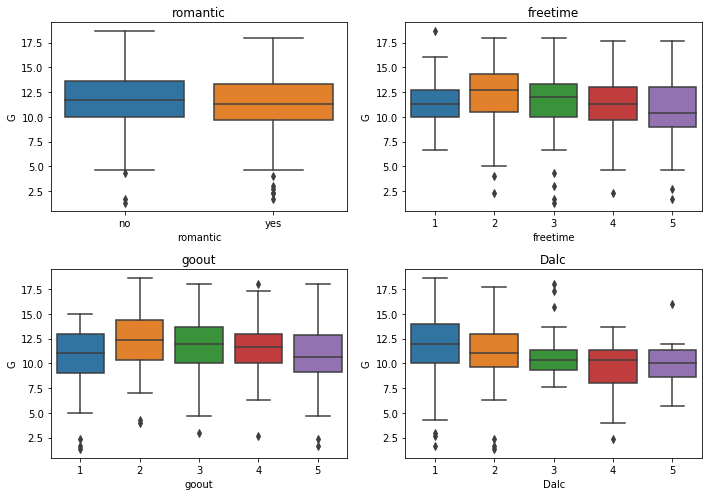

In [123]:
# social
plt.figure(figsize=(10,7))

plt.subplot(2,2,1) 
sns.boxplot(x='romantic',y='G', data=ds1)
plt.title('romantic')

plt.subplot(2,2,2) 
sns.boxplot(x='freetime',y='G', data=ds1)
plt.title('freetime')

plt.subplot(2,2,3) 
sns.boxplot(x='goout',y='G', data=ds1)
plt.title('goout')

plt.subplot(2,2,4) 
sns.boxplot(x='Dalc',y='G', data=ds1); plt.title('Dalc')

plt.tight_layout()
# freetime: 너무 놀면 안좋음, goout: 지나치면 안좋음, Dalc: 많이먹으면 안좋음.

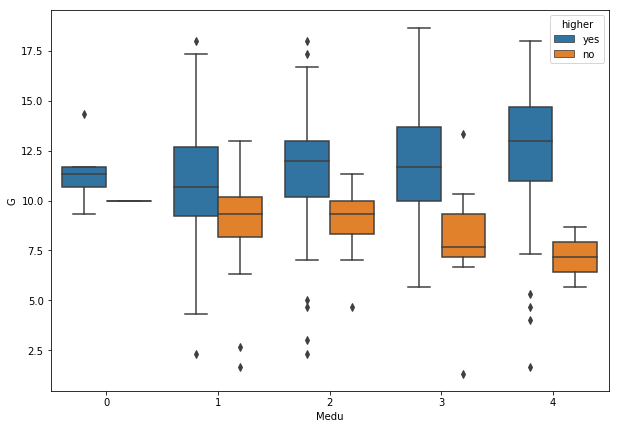

In [16]:
# higher, Medu를 고려한 G 
plt.figure(figsize=(10,7))

sns.boxplot(x='Medu',y='G',hue='higher',data=ds1)

## 4) 일부 numeric의 scoring과 범주형의 one-hot encoding 후 표준화 변수 추가해서 ds1(비표준화)과 ds2(표준화) 생성

In [3]:
# traveltime과 studytime 스코어링 다시하기
#df["순위"] = df["순위"].apply(lambda x: 999 if x == "" else 300 if x==1 else x)
ds1['traveltime']=ds1['traveltime'].apply(lambda x: 7.5 if x == 1 
                                              else 22.5 if x == 2
                                              else 45 if x == 3
                                              else 60)
ds1['studytime']=ds1['studytime'].apply(lambda x: 1 if x == 1
                                            else 3.5 if x == 2
                                            else 7.5 if x == 3
                                            else 12)

In [4]:
# 범주형 one-hot encoding
ds1['sex']=ds1['sex'].apply(lambda x: 0 if x == 'F'
                                   else 1)
ds1['school']=ds1['school'].apply(lambda x: 0 if x == 'GP'
                                   else 1)
ds1['address']=ds1['address'].apply(lambda x: 0 if x == 'U'
                                   else 1)
ds1['Pstatus']=ds1['Pstatus'].apply(lambda x: 0 if x == 'T'
                                   else 1)
ds1['famsize']=ds1['famsize'].apply(lambda x: 0 if x == 'LE3'
                                   else 1)
ds1['schoolsup']=ds1['schoolsup'].apply(lambda x: 0 if x == 'no'
                                   else 1)
ds1['famsup']=ds1['famsup'].apply(lambda x: 0 if x == 'no'
                                   else 1)
ds1['paid']=ds1['paid'].apply(lambda x: 0 if x == 'no'
                                   else 1)
ds1['activities']=ds1['activities'].apply(lambda x: 0 if x == 'no'
                                   else 1)
ds1['internet']=ds1['internet'].apply(lambda x: 0 if x == 'no'
                                   else 1)
ds1['higher']=ds1['higher'].apply(lambda x: 0 if x == 'no'
                                   else 1)
ds1['romantic']=ds1['romantic'].apply(lambda x: 0 if x == 'no'
                                   else 1)
ds1['nursery']=ds1['nursery'].apply(lambda x: 0 if x == 'no'
                                   else 1)


In [87]:
ds1.Medu.value_counts() # 변수의 빈도 수를 나타냄.

2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

In [198]:
ds1.iloc[1,:]

school              0
sex                 0
age                17
address             0
famsize             1
Pstatus             0
Medu                1
Mjob          at_home
Fjob            other
reason         course
guardian       father
traveltime        7.5
studytime         3.5
failures            0
schoolsup           0
famsup              1
paid                0
activities          0
nursery             0
higher              1
internet            1
romantic            0
famrel              5
freetime            3
goout               3
Dalc                1
health              3
absences            2
G             10.3333
Name: 1, dtype: object

In [5]:
ds2 = ds1.copy() # 원활한 편집을 위한 복사본. copy()함수를 써야 ds2가 바뀌어도 ds1이 안바뀜

In [6]:
# 다항 범주형들의 더미변수 생성
Medu_dummy = pd.get_dummies(ds2.Medu,drop_first=True)
Medu_dummy.rename(columns={'1':'Medu1','2':'Medu2','3':'Medu3','4':'Medu4'},inplace=True)

Mjob_dummy = pd.get_dummies(ds2.Mjob,drop_first=True)
Mjob_dummy.rename(columns={'health':'Mjob_health','other':'Mjob_other','services':'Mjob_services','teacher':'Mjob_teacher'},
                  inplace=True)

Fjob_dummy = pd.get_dummies(ds2.Fjob,drop_first=True)
Fjob_dummy.rename(columns={'health':'Fjob_health','other':'Fjob_other','services':'Fjob_services','teacher':'Fjob_teacher'},
                 inplace=True)

guardian_dummy = pd.get_dummies(ds2.guardian,drop_first=True)
guardian_dummy.rename(columns={'mother':'guardian_mother','other':'guardian_other'},inplace=True)

reason_dummy = pd.get_dummies(ds2.reason,drop_first=True)
reason_dummy.rename(columns={'home':'reason_home','other':'reason_other','reputation':'reason_reputation'},inplace=True)

ds3 = pd.concat([ds2,Medu_dummy,Mjob_dummy,Fjob_dummy,guardian_dummy,reason_dummy],axis=1)
ds4= ds3.drop(['Medu','Mjob','Fjob','guardian','reason'],axis=1)
#ds1 = ds.drop(['Fedu','Walc','G1','G2','G3'],axis=1)


In [7]:
# 표준화를 위해 X와 y를 구분하기
ds4_X = ds4.drop('G',axis=1)
ds4_y = ds4['G']


In [8]:
# 표준화 이전에 test and train set 분리
from sklearn.model_selection import train_test_split  #Scikit-Learn 의 model_selection library를 train_test_split로 명명
ds4_X_train,ds4_X_test,ds4_y_train,ds4_y_test=train_test_split(ds4_X,ds4_y, test_size=0.3, random_state=1)   # x와 y의 data를 각각 30%, 70%의 비율로 test_set과 training_set으로 나눔
print(ds4_X_train.shape)
print(ds4_X_test.shape)
print(ds4_y_train.shape)
print(ds4_y_test.shape)


(454, 40)
(195, 40)
(454,)
(195,)


In [9]:
# 표준화 필요한 변수들 정의하기!!
std_var = ['age','famrel','traveltime','studytime','failures','freetime','goout','Dalc','health','absences']

ds4_X_train_nstd_var = ds4_X_train.drop(std_var,axis=1) # 표준화 필요없는 X_train 변수들
ds4_X_test_nstd_var = ds4_X_test.drop(std_var,axis=1) # 표준화 필요없는 X_test 변수들

ds4_X_train_std_var = ds4_X_train.loc[:,std_var] # 표준화 필요있는 X_train 변수들
ds4_X_test_std_var = ds4_X_test.loc[:,std_var] # 표준화 필요있는 X_test 변수들

ds4_X_train = pd.concat([ds4_X_train_nstd_var,ds4_X_train_std_var],axis=1) # 기존의 train set도 표준화 없는것과 필요있는것으로 순서변경
ds4_X_test = pd.concat([ds4_X_test_nstd_var,ds4_X_test_std_var],axis=1) # test set도 마찬가지.

In [10]:
import numpy as np
print(ds4_X_train_nstd_var.columns)
print(ds4_X_train_std_var.columns)
pd.DataFrame(np.concatenate([ds4_X_train_nstd_var.columns.values,ds4_X_train_std_var.columns.values])) # 변수 번호표
var_name = pd.DataFrame(np.concatenate([ds4_X_train_nstd_var.columns.values,ds4_X_train_std_var.columns.values]))

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'Medu1', 'Medu2', 'Medu3', 'Medu4', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'guardian_mother', 'guardian_other',
       'reason_home', 'reason_other', 'reason_reputation'],
      dtype='object')
Index(['age', 'famrel', 'traveltime', 'studytime', 'failures', 'freetime',
       'goout', 'Dalc', 'health', 'absences'],
      dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler  #Scikit-Learn 의 model_selection library를 train_test_split로 명명
sc=StandardScaler()
sc.fit(ds4_X_train_std_var) # test data 말고 train 데이터에서만 tranform 해보자!!
ds4_X_train_std = sc.transform(ds4_X_train_std_var) # train에 적용
ds4_X_test_std = sc.transform(ds4_X_test_std_var) # test에 적용



In [13]:
# 최종 정리하기
import numpy as np
ds4_X_train_standard = np.column_stack((ds4_X_train_nstd_var.values, ds4_X_train_std)) # 비표준화 변수와 합치기(train)
ds4_X_test_standard = np.column_stack((ds4_X_test_nstd_var.values, ds4_X_test_std)) # 비표준화 변수와 합치기(test)

ds4_X_train_non_standard=ds4_X_train.values #표준화하지 않은 데이터셋도 array로 만들기
ds4_X_test_non_standard=ds4_X_test.values #test set도 마찬가지!!


In [14]:
print(ds4_X_train_standard)
print(ds4_X_train_non_standard)

[[ 0.          0.          0.         ... -0.5257888  -1.73272922
   0.86640308]
 [ 0.          0.          0.         ...  0.51207257  1.01063283
   0.02140416]
 [ 1.          1.          1.         ...  2.58779532 -0.3610482
  -0.82359476]
 ...
 [ 0.          0.          1.         ...  0.51207257  1.01063283
  -0.4010953 ]
 [ 0.          0.          0.         ... -0.5257888   1.01063283
   1.711402  ]
 [ 0.          1.          1.         ... -0.5257888   1.01063283
   0.02140416]]
[[ 0.  0.  0. ...  1.  1.  8.]
 [ 0.  0.  0. ...  2.  5.  4.]
 [ 1.  1.  1. ...  4.  3.  0.]
 ...
 [ 0.  0.  1. ...  2.  5.  2.]
 [ 0.  0.  0. ...  1.  5. 12.]
 [ 0.  1.  1. ...  1.  5.  4.]]


In [14]:
# 표준화 train - test set 와 비표준화 train - test set 구성 완료
print(ds4_X_train_standard.shape)
print(ds4_X_test_standard.shape)
print(ds4_X_train_non_standard.shape)
print(ds4_X_test_non_standard.shape) 

(454, 40)
(195, 40)
(454, 40)
(195, 40)


# 2. 모델링

## 표준화 여부 나눠서 진행하기 -> 초모수는 10-fold 교차검증 -> 선택된 초모수를 train에 다시 적합 -> Test MSE 구함 -> 최선 모델 도출 -> 변수 중요도 확인 절차

## 1) Elastic net 비표준화:  10-fold 교차검증으로 최적 초모수 도출

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

In [26]:
### Grid search에 의한 초모수 결정 (Elastic Net) ###
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
elt=ElasticNet(random_state=1) # 기초 엘라스틱 모델
param_range=np.linspace(0, 1, 101) # range 정의
param_grid=[{'l1_ratio':param_range,'alpha': [0, 0.001,0.01,0.1,1,10]}] # grid 정의
gs = GridSearchCV(estimator=elt,param_grid=param_grid,
                 scoring='neg_mean_squared_error',cv=10) # nmse(크면 좋음).. 10-fold 
gs = gs.fit(ds4_X_train_non_standard,ds4_y_train) # 10-fold 교차검증 시행
print(gs.best_score_) # 최적 스코어
print(gs.best_params_) # 최적 초모수 

clf = gs.best_estimator_ # 최적 초모수를 이용하여 모델 조건 구성
clf.fit(ds4_X_train_non_standard,ds4_y_train) # 모델 적합시켜서 모수까지 구함
ds4_y_train_pred = clf.predict(ds4_X_train_non_standard) # train set 예측값 구하기
ds4_y_test_pred = clf.predict(ds4_X_test_non_standard) # test set 예측값 구하기

from sklearn.metrics import mean_squared_error 
print('train mse: %s' % mean_squared_error(ds4_y_train,ds4_y_train_pred)) # train mse(높을수록 안좋다.)
print('test mse: %s' % mean_squared_error(ds4_y_test,ds4_y_test_pred)) # test mse


-5.279918780475141
{'alpha': 0.1, 'l1_ratio': 0.17}
train mse: 4.680398852144474
test mse: 6.488191745381808


In [27]:
en_coef = pd.Series(clf.coef_.round(3))
en_coef_abs = pd.Series(abs(clf.coef_.round(3)))
en_feature = pd.concat([var_name,en_coef,en_coef_abs],axis=1)
en_feature_import = en_feature.sort_values([1],ascending=False)
#data = data.sort_values(["time"], ascending=[False])


In [28]:
en_feature_import # 여기서 도대체 몇 개를 잘라야하나... 
# 실패가 많을수록 점수 떨어지고, 높은 곳을 더 가고싶은 사람이 더 열심히 하는 경향,
# 그리고 학교에 따라 달라지고, 엄마가 고학력자면 더 높은 성과, 
# 또한 reason_reputation은 학교평판에 따라 왔다는건데 그만큼 더 욕구가 있으니까 한다

,0,0,1
34,failures,-1.074,1.074
10,higher,0.812,0.812
0,school,-0.779,0.779
5,schoolsup,-0.465,0.465
16,Medu4,0.385,0.385
29,reason_reputation,0.369,0.369
3,famsize,-0.336,0.336
1,sex,-0.316,0.316
11,internet,0.277,0.277
24,Fjob_teacher,0.248,0.248


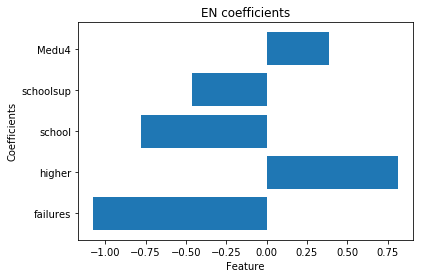

In [35]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# 중요변수 그림그리기
en_feature_import5 = en_feature_import.iloc[0:5,0:2]
x=en_feature_import5.iloc[:,0]; y=en_feature_import5.iloc[:,1]
plt.barh(x,y); plt.title('EN coefficients')
plt.xlabel('Feature'); plt.ylabel('Coefficients'); plt.show()

## 2) Elastic net 표준화

In [399]:
### Grid search에 의한 초모수 결정 (SVM) ###
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
elt=ElasticNet(random_state=1) # 기초 엘라스틱 모델
param_range=np.linspace(0, 1, 101) # range 정의
param_grid=[{'l1_ratio':param_range,'alpha': [0, 0.001,0.01,0.1,1,10]}] # grid 정의
gs = GridSearchCV(estimator=elt,param_grid=param_grid,
                 scoring='neg_mean_squared_error',cv=10) # nmse(크면 좋음).. 10-fold 
gs = gs.fit(ds4_X_train_standard,ds4_y_train) # 10-fold 교차검증 시행
print(gs.best_score_) # 최적 스코어
print(gs.best_params_) # 최적 초모수 

clf = gs.best_estimator_ # 최적 초모수를 이용하여 모델 조건 구성
clf.fit(ds4_X_train_standard,ds4_y_train) # 모델 적합시켜서 모수까지 구함
ds4_y_train_pred = clf.predict(ds4_X_train_standard) # train set 예측값 구하기
ds4_y_test_pred = clf.predict(ds4_X_test_standard) # test set 예측값 구하기

from sklearn.metrics import mean_squared_error 
print('train mse: %s' % mean_squared_error(ds4_y_train,ds4_y_train_pred)) # train mse(높을수록 안좋다.)
print('test mse: %s' % mean_squared_error(ds4_y_test,ds4_y_test_pred)) # test mse

-5.262177079081064
{'alpha': 0.1, 'l1_ratio': 0.15}
train mse: 4.6642783899239255
test mse: 6.51967243174338


## 3) SVM 비표준화

In [18]:
### Grid search에 의한 초모수 결정 (SVM) ###
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR()
#param_range=[ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # range 정의
param_range = [0.001,0.01,0.1,1,10]
param_grid = [{'C': param_range, 'epsilon':param_range, 'kernel': ['linear']},
              {'C': param_range, 'gamma': param_range, 'epsilon':param_range, 'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svr,param_grid=param_grid,
                 scoring='neg_mean_squared_error',cv=10) # nmse(크면 좋음).. 10-fold 
gs = gs.fit(ds4_X_train_non_standard,ds4_y_train) # 10-fold 교차검증 시행
print(gs.best_score_) # 최적 스코어
print(gs.best_params_) # 최적 초모수 

clf = gs.best_estimator_ # 최적 초모수를 이용하여 모델 조건 구성
clf.fit(ds4_X_train_non_standard,ds4_y_train) # 모델 적합시켜서 모수까지 구함
ds4_y_train_pred = clf.predict(ds4_X_train_non_standard) # train set 예측값 구하기
ds4_y_test_pred = clf.predict(ds4_X_test_non_standard) # test set 예측값 구하기

from sklearn.metrics import mean_squared_error 
print('train mse: %s' % mean_squared_error(ds4_y_train,ds4_y_train_pred)) # train mse(높을수록 안좋다.)
print('test mse: %s' % mean_squared_error(ds4_y_test,ds4_y_test_pred)) # test mse

-5.214277826247928
{'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}
train mse: 4.62207850725642
test mse: 6.600620663519906


## 4) SVM 표준화

In [17]:
### Grid search에 의한 초모수 결정 (SVM) ###
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR()
param_range = [0.001,0.01,0.1,1,10]
param_grid = [{'C': param_range, 'epsilon':param_range, 'kernel': ['linear']},
              {'C': param_range, 'gamma': param_range, 'epsilon':param_range, 'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svr,param_grid=param_grid,
                 scoring='neg_mean_squared_error',cv=10) # nmse(크면 좋음).. 10-fold 
gs = gs.fit(ds4_X_train_standard,ds4_y_train) # 10-fold 교차검증 시행
print(gs.best_score_) # 최적 스코어
print(gs.best_params_) # 최적 초모수 


clf = gs.best_estimator_ # 최적 초모수를 이용하여 모델 조건 구성
clf.fit(ds4_X_train_standard,ds4_y_train) # 모델 적합시켜서 모수까지 구함
ds4_y_train_pred = clf.predict(ds4_X_train_standard) # train set 예측값 구하기
ds4_y_test_pred = clf.predict(ds4_X_test_standard) # test set 예측값 구하기

from sklearn.metrics import mean_squared_error 
print('train mse: %s' % mean_squared_error(ds4_y_train,ds4_y_train_pred)) # train mse(높을수록 안좋다.)
print('test mse: %s' % mean_squared_error(ds4_y_test,ds4_y_test_pred)) # test mse

-5.1015840443185505
{'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
train mse: 3.742494282062449
test mse: 6.735965415001108


## 5) Decision Tree 비표준화

In [32]:
### Grid search에 의한 초모수 결정 (Decision Tree) ###
from sklearn.model_selection import GridSearchCV
from sklearn import tree
tree = tree.DecisionTreeRegressor(random_state=1)
#param_range=[ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # range 정의
param_range = [1,2,3,4]
param_grid = [{'max_depth':param_range}]
gs = GridSearchCV(estimator=tree,param_grid=param_grid,
                 scoring='neg_mean_squared_error',cv=10) # nmse(크면 좋음).. 10-fold 
gs = gs.fit(ds4_X_train_non_standard,ds4_y_train) # 10-fold 교차검증 시행
print(gs.best_score_) # 최적 스코어
print(gs.best_params_) # 최적 초모수 

clf = gs.best_estimator_ # 최적 초모수를 이용하여 모델 조건 구성
clf.fit(ds4_X_train_non_standard,ds4_y_train) # 모델 적합시켜서 모수까지 구함
ds4_y_train_pred = clf.predict(ds4_X_train_non_standard) # train set 예측값 구하기
ds4_y_test_pred = clf.predict(ds4_X_test_non_standard) # test set 예측값 구하기

from sklearn.metrics import mean_squared_error 
print('train mse: %s' % mean_squared_error(ds4_y_train,ds4_y_train_pred)) # train mse(높을수록 안좋다.)
print('test mse: %s' % mean_squared_error(ds4_y_test,ds4_y_test_pred)) # test mse

-5.662784118070399
{'max_depth': 2}
train mse: 5.358238298500251
test mse: 7.124096332428463


## 6) Decision Tree 표준화

In [33]:
### Grid search에 의한 초모수 결정 (Decision Tree) ###
from sklearn.model_selection import GridSearchCV
from sklearn import tree
tree = tree.DecisionTreeRegressor(random_state=1)
#param_range=[ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # range 정의
param_range = [1,2,3,4]
param_grid = [{'max_depth':param_range}]
gs = GridSearchCV(estimator=tree,param_grid=param_grid,
                 scoring='neg_mean_squared_error',cv=10) # nmse(크면 좋음).. 10-fold 
gs = gs.fit(ds4_X_train_standard,ds4_y_train) # 10-fold 교차검증 시행
print(gs.best_score_) # 최적 스코어
print(gs.best_params_) # 최적 초모수 

clf = gs.best_estimator_ # 최적 초모수를 이용하여 모델 조건 구성
clf.fit(ds4_X_train_standard,ds4_y_train) # 모델 적합시켜서 모수까지 구함
ds4_y_train_pred = clf.predict(ds4_X_train_standard) # train set 예측값 구하기
ds4_y_test_pred = clf.predict(ds4_X_test_standard) # test set 예측값 구하기

from sklearn.metrics import mean_squared_error 
print('train mse: %s' % mean_squared_error(ds4_y_train,ds4_y_train_pred)) # train mse(높을수록 안좋다.)
print('test mse: %s' % mean_squared_error(ds4_y_test,ds4_y_test_pred)) # test mse

-5.662784118070399
{'max_depth': 2}
train mse: 5.358238298500251
test mse: 7.124096332428463


## 7) Random Forest 비표준화

In [19]:
### Grid search에 의한 초모수 결정 (Random Forest) ###
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=3000,random_state=1)
param_range = [2,3,4,5,6,7]
param_grid = [{'max_features':param_range}]
gs = GridSearchCV(estimator=forest,param_grid=param_grid,
                 scoring='neg_mean_squared_error',cv=10) # nmse(크면 좋음).. 10-fold 
gs = gs.fit(ds4_X_train_non_standard,ds4_y_train) # 10-fold 교차검증 시행
print(gs.best_score_) # 최적 스코어
print(gs.best_params_) # 최적 초모수 

clf = gs.best_estimator_ # 최적 초모수를 이용하여 모델 조건 구성
clf.fit(ds4_X_train_non_standard,ds4_y_train) # 모델 적합시켜서 모수까지 구함
ds4_y_train_pred = clf.predict(ds4_X_train_non_standard) # train set 예측값 구하기
ds4_y_test_pred = clf.predict(ds4_X_test_non_standard) # test set 예측값 구하기

from sklearn.metrics import mean_squared_error 
print('train mse: %s' % mean_squared_error(ds4_y_train,ds4_y_train_pred)) # train mse(높을수록 안좋다.)
print('test mse: %s' % mean_squared_error(ds4_y_test,ds4_y_test_pred)) # test mse

-4.933386124504678
{'max_features': 7}
train mse: 0.6480162569350129
test mse: 6.5143930247142405


## 8) XGBoost 비표준화

In [59]:
### Grid search에 의한 초모수 결정 (XGBoost) ###
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xg_reg=xgb.XGBRegressor(objective='reg:squarederror',booster='gbtree',random_state=1)
                        

param_grid = [{'colsample_bytree':np.linspace(0,1,11),'max_depth':[3,4,5,6,7],
               'gamma':np.linspace(0,1,26),'learning_rate':np.linspace(0.01,0.1,5)}]

gs = GridSearchCV(estimator=xg_reg,param_grid=param_grid,
                 scoring='neg_mean_squared_error',cv=10) # nmse(크면 좋음).. 10-fold 
gs = gs.fit(ds4_X_train_non_standard,ds4_y_train) # 10-fold 교차검증 시행
print(gs.best_score_) # 최적 스코어
print(gs.best_params_) # 최적 초모수 

clf = gs.best_estimator_ # 최적 초모수를 이용하여 모델 조건 구성
clf.fit(ds4_X_train_non_standard,ds4_y_train) # 모델 적합시켜서 모수까지 구함
ds4_y_train_pred = clf.predict(ds4_X_train_non_standard) # train set 예측값 구하기
ds4_y_test_pred = clf.predict(ds4_X_test_non_standard) # test set 예측값 구하기

from sklearn.metrics import mean_squared_error 
print('train mse: %s' % mean_squared_error(ds4_y_train,ds4_y_train_pred)) # train mse(높을수록 안좋다.)
print('test mse: %s' % mean_squared_error(ds4_y_test,ds4_y_test_pred)) # test mse

-4.829421812831582
{'colsample_bytree': 0.6000000000000001, 'gamma': 0.4, 'learning_rate': 0.0775, 'max_depth': 4}
train mse: 1.5450573890814172
test mse: 6.851742068170503
